## **Background**
SUPER-MART telah menjadi destinasi utama bagi para pelanggan yang mencari berbagai kebutuhan berkualitas. Dikenal dengan keberagaman produknya, supermarket ini menawarkan berbagai produk seperti: **Wine, Fruits, Meat, Fish, Sweets, dan Gold**. Sejak didirikan, setidaknya perusahaan ini telah melancarkan beberapa kali promosi **campaign** dan terus memperluas jangkauannya dan memperkenalkan produknya kepada lebih banyak konsumen. Melalui  channel untuk melakukan pemesanan: **Website, Catalog, dan Store**, perusahaan memastikan kenyamanan dan kemudahan bagi pelanggan dalam mendapatkan produk-produk berkualitas yang mereka butuhkan.

Meskipun sudah lama beroperasi, pihak pengelola SUPER-MART merasa bahwa kampanye sebelumnya masih belum efisien dan ingin meningkatkan strategi untuk kampanye selanjutnya. 


### **Problem Statement**

Untuk meningkatkan efektivitas kampanye di masa depan, manajemen SUPER-MART telah meminta tim untuk mengevaluasi kinerja kampanye-kampanye sebelumnya. Selain itu, perusahaan ingin memahami segmentasi pelanggan dan mengidentifikasi area potensial untuk pertumbuhan dan pengembangan. Informasi ini akan menjadi kunci dalam merancang kampanye yang lebih strategis dan efektif ke depannya. Permasalahan terbagi menjadi berikut ini:


1. Seperti apa demografi dan preferensi tiap segment customer untuk menyempurnakan strategi pemasaran yang tepat dan mendorong pengalaman belanja yang personal?

1. Seberapa efektif kampanye-kampanye sebelumnya dalam menarik pelanggan dan meningkatkan penjualan?
 
1. Bagaimana SUPER-MART dapat memberikan pelayanan dan promo yang tepat bagi berbagai tipe customer demi meningkatkan profit?

### **Goals**
Hasil dari analisis mendalam terhadap data ini akan menjadi kunci bagi tim Sales & Marketing dalam mengidentifikasi segmen pelanggan yang memiliki potensi besar untuk meningkatkan penjualan pada lini produk dan platform. Dengan informasi ini, tim pemasaran dapat menyempurnakan strategi mereka, membantu SUPER-MART meningkatkan penjualan dan mengembangkan bisnisnya.



### **Dataset Explanation**

Data `Supermarket Customers` database terdiri dari 29 kolom. Kolom-kolom ini mencakup informasi tentang demografi pelanggan dan perilaku pembelian mereka. Perilaku ini mencakup jumlah produk yang dibeli dari setiap kategori, aktivitas pembelian yang terkait dengan promosi, dan jumlah pembelian berdasarkan saluran belanja (website, katalog, dan di toko). Data dikumpulkan antara Juli 2012 dan Juni 2014.


In [324]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn_extra.cluster import KMedoids
import squarify
import scipy.stats as ss
import missingno as msn
import math
import warnings
from category_encoders import OrdinalEncoder
pd.options.display.max_columns=40
warnings.filterwarnings("ignore", category=FutureWarning)

In [430]:
df=pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### **Data Understanding**
Untuk melakukan analisis data yang tepat, penting untuk memahami jenis data yang terkait dengan setiap kolom. Berikut adalah tabel yang menggambarkan jenis data beserta kondisi tiap tipe kolom:

In [431]:
stats = []
for column in df.columns:
    dtype = df[column].dtype
    null_count = df[column].isnull().sum()
    null_pct = round((null_count / len(df)) * 100,2)
    unique_count = df[column].nunique()
    unique_sample = df[column].dropna().sample(min(6, unique_count)).tolist()

    stats.append({
        'Kolom Data': column,
        'Tipe Data': dtype,
        'Null': null_count,
        'nullPct(%)': null_pct,
        'unique': unique_count,
        'uniqueSample': unique_sample
    })

pd.DataFrame(stats)

,Kolom Data,Tipe Data,Null,nullPct(%),unique,uniqueSample
0,ID,int64,0,0.00,2240,"[2276, 1158, 10641, 5848, 5267, 271]"
1,Year_Birth,int64,0,0.00,59,"[1952, 1953, 1978, 1948, 1959, 1961]"
2,Education,object,0,0.00,5,"[PhD, Graduation, PhD, Master, Graduation]"
3,Marital_Status,object,0,0.00,8,"[Divorced, Married, Married, Single, Together, Together]"
4,Income,float64,24,1.07,1974,"[21474.0, 73454.0, 41638.0, 38988.0, 64090.0, 52413.0]"
5,Kidhome,int64,0,0.00,3,"[1, 1, 0]"
6,Teenhome,int64,0,0.00,3,"[1, 0, 1]"
7,Dt_Customer,object,0,0.00,663,"[30-09-2013, 11-09-2012, 18-04-2013, 29-09-2012, 26-06-2014, 28-02-2013]"
8,Recency,int64,0,0.00,100,"[22, 25, 83, 75, 81, 96]"
9,MntWines,int64,0,0.00,776,"[977, 940, 77, 508, 509, 11]"


In [432]:
df.duplicated().sum()

0

In [433]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### **Exploratory Data Analysis (Pre-Cleaning)** 

In [434]:
#Klasifikasi jenis tipe kolom data
categorical_columns = ['Education', 'Marital_Status','IncomeClass','Generation','preferredPlatform']

binary_columns = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
                     'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']

datetime_columns = ["Dt_Customer"]

### **Univariate Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

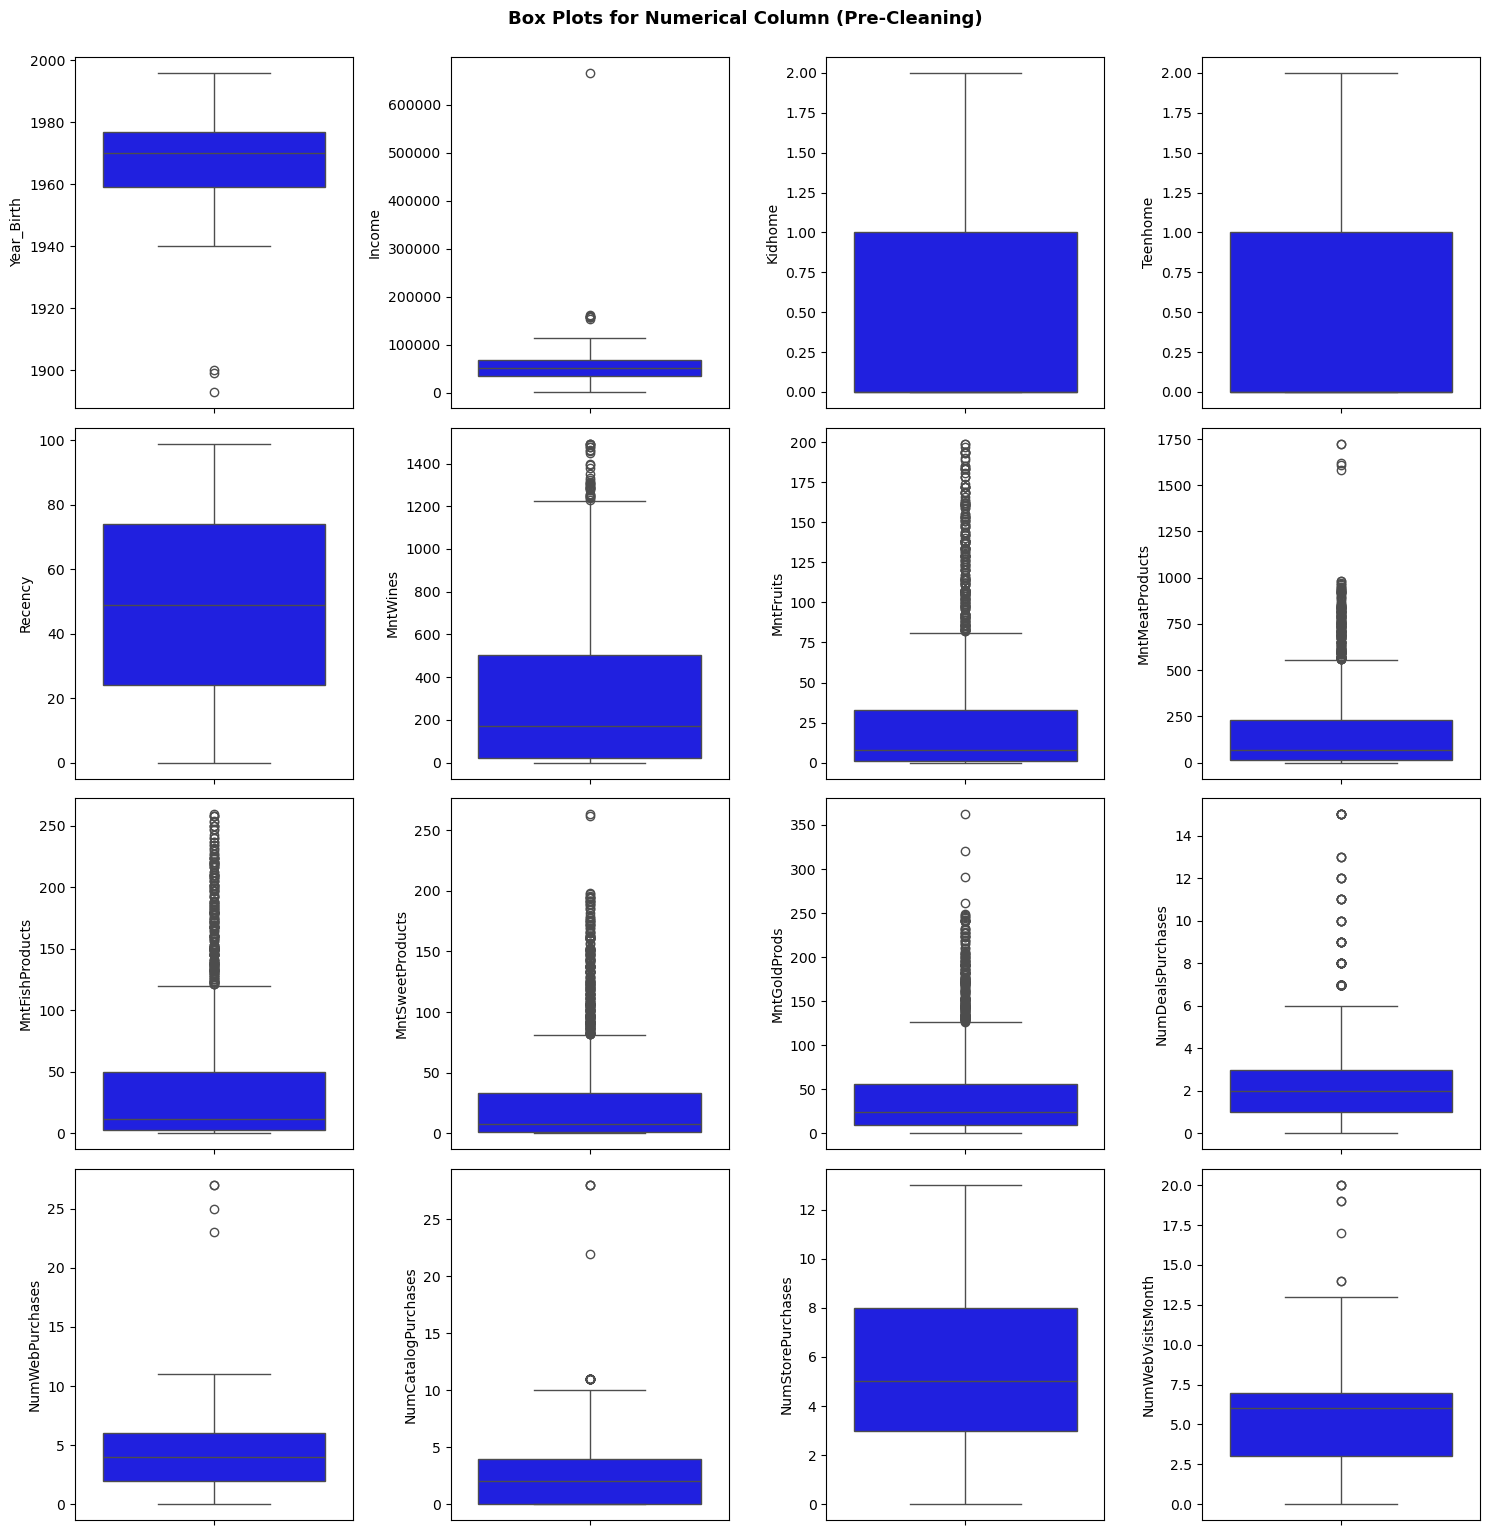

In [435]:
#Univariate Analysis dengan Box Plots
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.boxplot(y=df[numerical_columns[i]], color='blue', orient='v')
    plt.tight_layout()

plt.suptitle('Box Plots for Numerical Column (Pre-Cleaning)', fontsize=13, y=1.02, fontweight='bold')
plt.show


<Figure size 1500x1500 with 0 Axes>

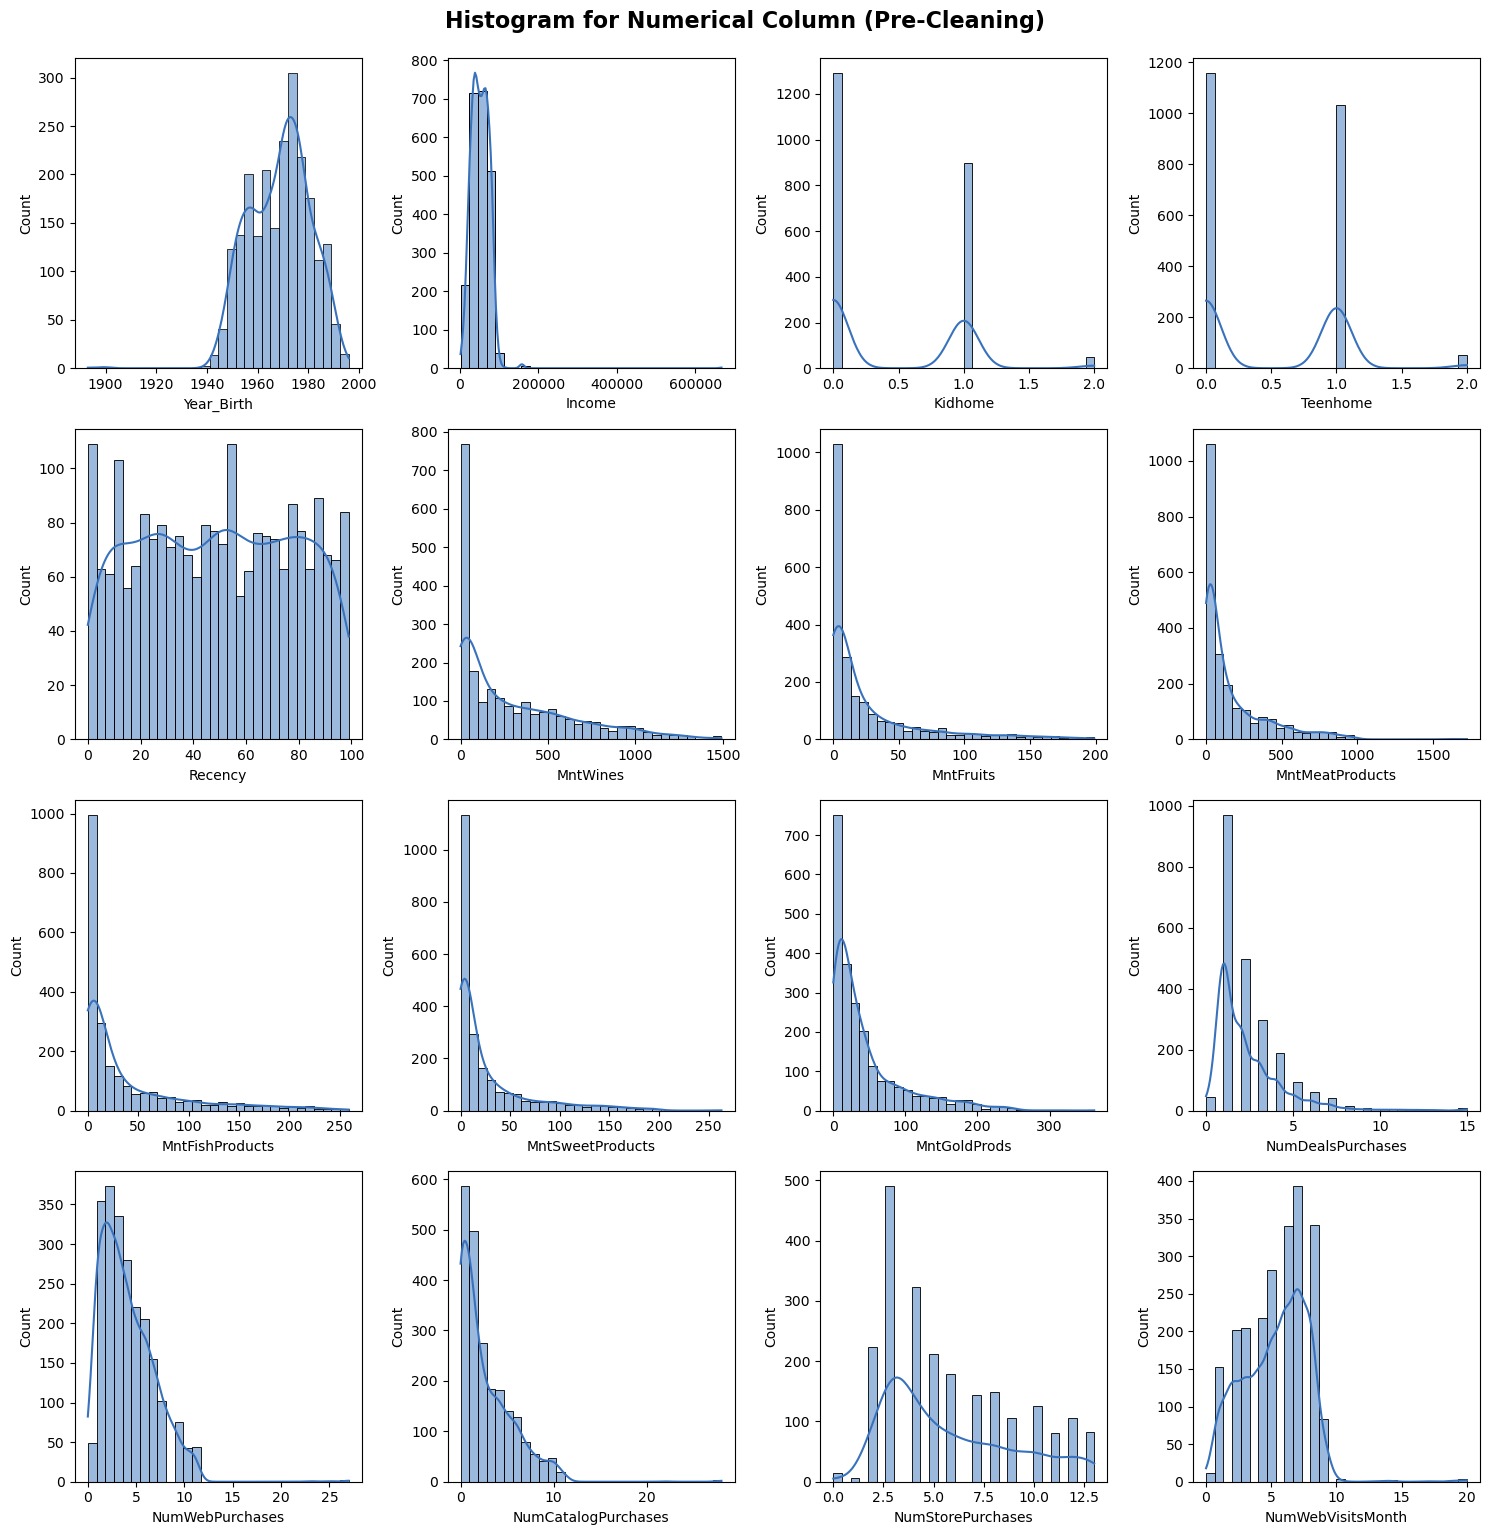

<Figure size 1500x1500 with 0 Axes>

In [436]:
#Univariate Analysis dengan Histogram
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df[numerical_columns[i]], color='#3972bc', bins=30, kde=True)
    plt.tight_layout()

plt.suptitle('Histogram for Numerical Column (Pre-Cleaning)', fontsize=16, y=1.02, fontweight='bold')
plt.show

plt.figure(figsize=(15, 15))


### **Observations**

Berdasarkan tinjauan awal terhadap data awal, kami telah mengidentifikasi beberapa masalah pada dataset yang memerlukan perhatian lebih lanjut:

`Missing Values`:
* Terdapat 24 missing value pada kolom income.

`Outliers`:
* Adanya outliers pada Income dan Year_Birth

`Wrong Data Type Format`:
* Data Type dari Dt_Columns saat ini object dimana seharusnya berformat datetime.

`Redundant Values in Categorical Columns`:
* Kolom marital_status memiliki kategori yang redundant yang dapat didisatukan.
* Kolom education "master degree" & "2nd cycle" bermakna sama dan dapat disatukan.

`Unused Columns`:
* Kolom Z_CostContact & Z_Revenue memiliki value yang sama di tiap baris dan tidak dapat digunakan sehingga dapat di drop.

### **Data Cleaning**

In [437]:
# change datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [438]:
# Remove duplicate
# menampilkan dataframe data duplikasi dengan ID yang berbeda namun data lainnya identik
display(df[df.duplicated(subset=df.columns.difference(['ID']),keep=False)].sort_values('Income'),df[df.duplicated(subset=df.columns.difference(['ID']))].shape)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
30,6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1138,10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1203,234,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
260,10264,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
558,8420,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1
1301,6024,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1
943,5386,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1
650,4248,1960,Master,Single,98777.0,0,0,2014-02-17,23,1000,19,711,125,115,38,0,4,6,9,1,0,1,0,0,0,0,3,11,0


(182, 29)

In [439]:
# menghapus 182 dari 358 baris yang memiliki nilai yang sama dalam semua kolom kecuali kolom 'ID' dalam DataFrame df
df.drop_duplicates(subset=df.columns.difference(['ID']),inplace=True)
df[df.duplicated(subset=df.columns.difference(['ID']))]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [440]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Response']),keep=False)].sort_values('Income').head(10),df[df.duplicated(subset=df.columns.difference(['ID','Response']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
548,9671,1968,Graduation,Married,19514.0,1,1,2014-01-26,47,14,3,21,2,1,28,4,3,1,2,8,1,0,0,0,0,0,3,11,1
1008,8975,1968,Graduation,Married,19514.0,1,1,2014-01-26,47,14,3,21,2,1,28,4,3,1,2,8,1,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
408,5049,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,0
1614,6215,1977,Graduation,Married,31353.0,1,1,2013-12-29,24,10,0,10,3,1,7,2,1,1,2,8,0,0,0,0,0,0,3,11,1
195,7224,1977,Graduation,Married,31353.0,1,1,2013-12-29,24,10,0,10,3,1,7,2,1,1,2,8,0,0,0,0,0,0,3,11,0
1426,8254,1974,PhD,Married,34596.0,1,0,2013-04-13,48,14,0,2,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,0
968,2620,1974,PhD,Married,34596.0,1,0,2013-04-13,48,14,0,2,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,1
1715,10340,1984,Graduation,Together,35196.0,1,0,2012-11-13,68,75,12,141,43,39,187,6,6,1,5,8,0,0,0,0,0,0,3,11,0
1048,8870,1984,Graduation,Together,35196.0,1,0,2012-11-13,68,75,12,141,43,39,187,6,6,1,5,8,0,0,0,0,0,0,3,11,1


(19, 29)

Terdapat **19** baris yang `ID` dan `Response` nya berbeda tapi data lainnya identik

In [441]:
# menghapus baris-baris yang memiliki nilai yang sama dalam semua kolom kecuali kolom 'ID' dan 'Response' dalam DataFrame df
df.drop_duplicates(subset=df.columns.difference(['ID','Response']),inplace=True)
df[df.duplicated(subset=df.columns.difference(['ID','Response']))]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [442]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']),keep=False)].sort_values('Income'),df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
842,3312,1988,Graduation,Single,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
1063,2055,1973,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,0
1595,1041,1973,PhD,Single,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2188,10652,1957,Master,Together,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0


(4, 29)

Terdapat **4** baris yang duplikat disini data yang dipilih adalah data dengan `Marital_Status` yang umum yaitu **Single**, **Divorced** atau **Together**.

In [443]:
df.drop([153,138,2177,2134],inplace=True)

In [444]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']),keep=False)].sort_values('Income'),df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


(0, 29)

In [445]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Income','Education','Response','Marital_Status']),keep=False)].sort_values('Recency'),df[df.duplicated(subset=df.columns.difference(['ID','Income']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1386,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1392,10146,1972,PhD,Together,38887.0,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0
620,2782,1961,PhD,Married,54456.0,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
534,8724,1982,Graduation,Single,28567.0,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
1917,4385,1981,PhD,Single,36038.0,1,0,2013-05-31,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,3,11,0
2061,1612,1981,PhD,Single,NaN,1,0,2013-05-31,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,3,11,0


(4, 29)

Ada 4 data yang `ID` dan `Income` nya berbeda namun data lainnya sama, oleh karena itu baris yang di drop adalah baris dengan missing value 

In [446]:
df.drop([1386,128,58,2061],inplace=True)
display(df[df.duplicated(subset=df.columns.difference(['ID','Income','Education','Response','Marital_Status','Recency']),keep=False)].sort_values('Recency'),df[df.duplicated(subset=df.columns.difference(['ID','Income']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


(0, 29)

Secara kesuluruhan ditemukan 209 data duplikat yang telah di drop

### **Correcting Values & Handling Missing Value**

In [447]:
#Simplify Education Categories
df['Education'].replace({'Graduation':'Undergraduate', '2n Cycle':'Postgraduate', 'Master':'Postgraduate'}, inplace=True)
print(df['Education'].value_counts())

Education
Undergraduate    1023
Postgraduate      522
PhD               437
Basic              49
Name: count, dtype: int64


In [448]:
# Simplify Marital Status Category
df['Marital_Status'].replace({'Absurd':'Single', 'Alone':'Single', 'YOLO':'Single', 'Widow':'Single', 'Divorced':'Single', 'Together':'Partnered', 'Married':'Partnered'}, inplace=True)
print(df['Marital_Status'].value_counts())

Marital_Status
Partnered    1303
Single        728
Name: count, dtype: int64


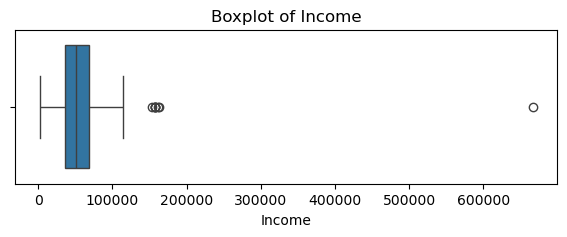

In [449]:
#menampilkan Outlier income dalam grafis boxplot
plt.figure(figsize=(7, 2))
sns.boxplot(df,x='Income')
plt.xlabel('Income')
plt.title('Boxplot of Income')
plt.show()

In [450]:
#Hapus Outlier dengan Income terbesar (666666)
df.drop(df[df['Income'] > 200000].index,inplace=True)

In [451]:
#Menampilkan data dengan Income yang missing value
df[df['Income'].isna()==True].index
inan=df[df['Income'].isna()].index
df.loc[inan]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Undergraduate,Partnered,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Undergraduate,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Undergraduate,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Postgraduate,Partnered,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Partnered,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Undergraduate,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Postgraduate,Partnered,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
133,1295,1963,Undergraduate,Partnered,NaN,0,1,2013-08-11,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0
312,2437,1989,Undergraduate,Partnered,NaN,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0


In [452]:
#Mengisi nilai missing value dengan median
df['Income']=df['Income'].fillna(df.groupby(['Education', 'Kidhome', 'Teenhome'])['Income'].transform('median'))
df.loc[inan]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Undergraduate,Partnered,31040.5,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Undergraduate,Single,31040.5,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,74250.0,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Undergraduate,Single,35329.5,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Postgraduate,Partnered,33181.0,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Partnered,43484.0,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Undergraduate,Single,42554.0,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Postgraduate,Partnered,72472.0,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
133,1295,1963,Undergraduate,Partnered,59686.0,0,1,2013-08-11,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0
312,2437,1989,Undergraduate,Partnered,72407.0,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0


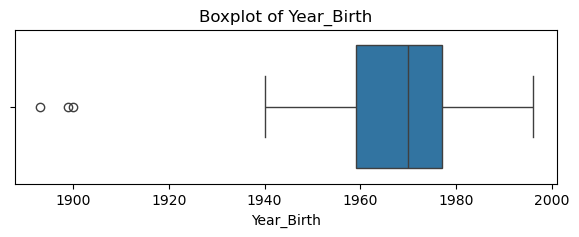

In [453]:
#menampilkan Outlier Year of Birth dalam grafis boxplot
plt.figure(figsize=(7, 2))
sns.boxplot(df,x='Year_Birth')
plt.xlabel('Year_Birth')
plt.title('Boxplot of Year_Birth')
plt.show()

In [454]:
#Hapus Outlier dengan Income terbesar (666666)
df.drop(df[df['Year_Birth'] < 1920].index,inplace=True)

### **Modifying Columns**

In [455]:
# Tambah kolom TotalAcceptedCamp
df["TotalAcceptedCmp"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Tambah kolom Monetary
df["Monetary"] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Tambah kolom Frequency
df["Frequency"] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] 

In [456]:
df[df['Frequency']==0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAcceptedCmp,Monetary,Frequency
655,5555,1975,Undergraduate,Single,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,0,6,0
981,3955,1965,Undergraduate,Single,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,0,6,0
1524,11110,1973,Undergraduate,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,0,5,0
2132,11181,1949,PhD,Partnered,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,0,8,0


In [457]:
#Hapus Customer dengan Frequency belanja 0
df.drop(df[df['Frequency'] == 0].index,inplace=True)

In [458]:
#Hapus kolom yang tidak digunakan
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1)

In [459]:
# encoding Marital_Status to total Adulthome
df['Adulthome'] = df['Marital_Status']

mappings = [ {'col': 'Adulthome', 'mapping':{'Partnered': 2, 'Single': 1}}]

ordinal_encoder = OrdinalEncoder(cols=['Adulthome'], mapping=mappings)
df = ordinal_encoder.fit_transform(df)

# Tambah FamilySize column
df["FamilySize"] = df['Kidhome'] + df['Teenhome'] + df['Adulthome']


In [460]:
# Tambah kolom Generation berdasarkan on Year_Birth

def determine_generation(Year_Birth):
    if Year_Birth >= 1928 and Year_Birth <= 1945:
        return 'Silent Gen'
    if Year_Birth >= 1946 and Year_Birth <= 1964:
        return 'Baby Boomers'
    elif Year_Birth >= 1965 and Year_Birth <= 1980:
        return 'Gen X'
    elif Year_Birth >= 1981 and Year_Birth <= 1996:
        return 'Millennials'
    elif Year_Birth >= 1997:
        return 'Gen Z'
    else:
        return 'Unknown'    
df['Generation'] = df['Year_Birth'].apply(determine_generation)
df["Generation"].value_counts()

Generation
Gen X           968
Baby Boomers    688
Millennials     344
Silent Gen       23
Name: count, dtype: int64

In [461]:
def IncomeClass(income):
    if income <= 30000:
        return "Lower Class"
    elif income >= 30001 and income <= 58020:
        return "Lower Middle Class"
    elif income >= 58021 and income <= 94000:
        return "Middle Class"
    elif income >= 94001 and income <= 153000:
        return "Upper Middle Class"
    else:
        return "Upper Class"

df["IncomeClass"] = df["Income"].apply(IncomeClass)
df["IncomeClass"].value_counts()

IncomeClass
Lower Middle Class    870
Middle Class          799
Lower Class           334
Upper Middle Class     15
Upper Class             5
Name: count, dtype: int64

In [466]:
# Tambah kolom 'preferredPlatform' 
df.loc[(df['NumWebPurchases'] > df['NumCatalogPurchases']) & (df['NumWebPurchases'] > df['NumStorePurchases']), 'preferredPlatform'] = 'Web'
df.loc[(df['NumStorePurchases'] > df['NumCatalogPurchases']) & (df['NumStorePurchases'] > df['NumWebPurchases']), 'preferredPlatform'] = 'Store'
df.loc[(df['NumCatalogPurchases'] > df['NumStorePurchases']) & (df['NumCatalogPurchases'] > df['NumWebPurchases']), 'preferredPlatform'] = 'Catalog'
df.loc[((df['NumWebPurchases'] == df['NumCatalogPurchases']) & (df['NumWebPurchases'] > df['NumStorePurchases'])) |
       ((df['NumWebPurchases'] == df['NumStorePurchases']) & (df['NumWebPurchases'] > df['NumCatalogPurchases'])) |
       ((df['NumCatalogPurchases'] == df['NumStorePurchases']) & (df['NumCatalogPurchases'] > df['NumWebPurchases'])) |
       ((df['NumWebPurchases'] == df['NumCatalogPurchases']) & (df['NumWebPurchases'] == df['NumStorePurchases'])), 'preferredPlatform'] = 'No Preference'

In [467]:
new_order = [
    'ID', 'Year_Birth', 'Generation', 'Education', 'Income', 'IncomeClass', 
    'Marital_Status', 'Adulthome', 'Kidhome', 'Teenhome', 'FamilySize',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'TotalAcceptedCmp', 'Response',
    'Dt_Customer', 'Complain','preferredPlatform','Recency','Frequency','Monetary'
]

df = df[new_order]

,ID,Year_Birth,Generation,Education,Income,IncomeClass,Marital_Status,Adulthome,Kidhome,Teenhome,FamilySize,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Response,Dt_Customer,Complain,Recency,Monetary,Frequency,preferredPlatform
0,5524,1957,Baby Boomers,Undergraduate,58138.0,Middle Class,Single,1,0,0,1,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-09-04,0,58,1617,25,Catalog
1,2174,1954,Baby Boomers,Undergraduate,46344.0,Lower Middle Class,Single,1,1,1,3,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-03-08,0,38,27,6,Store
2,4141,1965,Gen X,Undergraduate,71613.0,Middle Class,Partnered,2,0,0,2,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-08-21,0,26,776,21,Store
3,6182,1984,Millennials,Undergraduate,26646.0,Lower Class,Partnered,2,1,0,3,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-02-10,0,26,53,8,Store
4,5324,1981,Millennials,PhD,58293.0,Middle Class,Partnered,2,1,0,3,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-01-19,0,94,422,19,Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Millennials,Undergraduate,26816.0,Lower Class,Single,1,0,0,1,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,2012-08-17,0,50,22,4,Store
2235,10870,1967,Gen X,Undergraduate,61223.0,Middle Class,Partnered,2,0,1,3,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013-06-13,0,46,1341,18,Web
2237,7270,1981,Millennials,Undergraduate,56981.0,Lower Middle Class,Single,1,0,0,1,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,1,0,2014-01-25,0,91,1241,19,Store
2238,8235,1956,Baby Boomers,Postgraduate,69245.0,Middle Class,Partnered,2,0,1,3,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014-01-24,0,8,843,23,Store


In [469]:
df

,ID,Year_Birth,Generation,Education,Income,IncomeClass,Marital_Status,Adulthome,Kidhome,Teenhome,FamilySize,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Response,Dt_Customer,Complain,Recency,Monetary,Frequency,preferredPlatform
0,5524,1957,Baby Boomers,Undergraduate,58138.0,Middle Class,Single,1,0,0,1,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-09-04,0,58,1617,25,Catalog
1,2174,1954,Baby Boomers,Undergraduate,46344.0,Lower Middle Class,Single,1,1,1,3,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-03-08,0,38,27,6,Store
2,4141,1965,Gen X,Undergraduate,71613.0,Middle Class,Partnered,2,0,0,2,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-08-21,0,26,776,21,Store
3,6182,1984,Millennials,Undergraduate,26646.0,Lower Class,Partnered,2,1,0,3,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-02-10,0,26,53,8,Store
4,5324,1981,Millennials,PhD,58293.0,Middle Class,Partnered,2,1,0,3,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-01-19,0,94,422,19,Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Millennials,Undergraduate,26816.0,Lower Class,Single,1,0,0,1,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,2012-08-17,0,50,22,4,Store
2235,10870,1967,Gen X,Undergraduate,61223.0,Middle Class,Partnered,2,0,1,3,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013-06-13,0,46,1341,18,Web
2237,7270,1981,Millennials,Undergraduate,56981.0,Lower Middle Class,Single,1,0,0,1,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,1,0,2014-01-25,0,91,1241,19,Store
2238,8235,1956,Baby Boomers,Postgraduate,69245.0,Middle Class,Partnered,2,0,1,3,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014-01-24,0,8,843,23,Store


In [470]:
# save to csv format
df.to_csv('Cleaned_Supermarket_Customers.csv')